# Classification with Census Income dataset

In [2]:
!pip install ucimlrepo
!pip install squarify

In [3]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import squarify
import glob
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Colab/TUW/ML/ML 0/adult/adult.data',
                    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                           'marital-status', 'occupation', 'relationship', 'race', 'sex',
                           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                           'income'],
                    index_col=False)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data_test = pd.read_csv('/content/drive/MyDrive/Colab/TUW/ML/ML 0/adult/adult.test',
                    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                           'marital-status', 'occupation', 'relationship', 'race', 'sex',
                           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                           'income'],
                    index_col=False)
data_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [6]:
data.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Data preparation

In [8]:
def data_preparing(df, cols):
  # getting rid of whitespace in object columns
  df[cols] = df[cols].apply(lambda x: x.astype(str).str.strip())
  # replacing ? with nan
  df = df.replace({'?': np.nan})

  print(
    f"The dataset contains {df.shape[0]} samples and "
    f"{len(df.columns)} columns"
  )

  return df

In [9]:
data_prepared = data_preparing(data, ['age', 'workclass', 'education',
                                      'marital-status', 'occupation', 'relationship', 'race', 'sex',
                                      'native-country', 'income'])

data_prepared['age'] = data_prepared['age'].astype(int)
data_prepared.head(10)

The dataset contains 32561 samples and 15 columns


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [10]:
# Count missing values in each column
missing_values = data_prepared.isnull().sum()
print(missing_values)

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64


In [11]:
# Fill missing values in categorical columns with the most common value (mode)
data_prepared['workclass'] = data_prepared['workclass'].fillna(data_prepared['workclass'].mode()[0])
data_prepared['occupation'] = data_prepared['occupation'].fillna(data_prepared['occupation'].mode()[0])
data_prepared['native-country'] = data_prepared['native-country'].fillna(data_prepared['native-country'].mode()[0])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

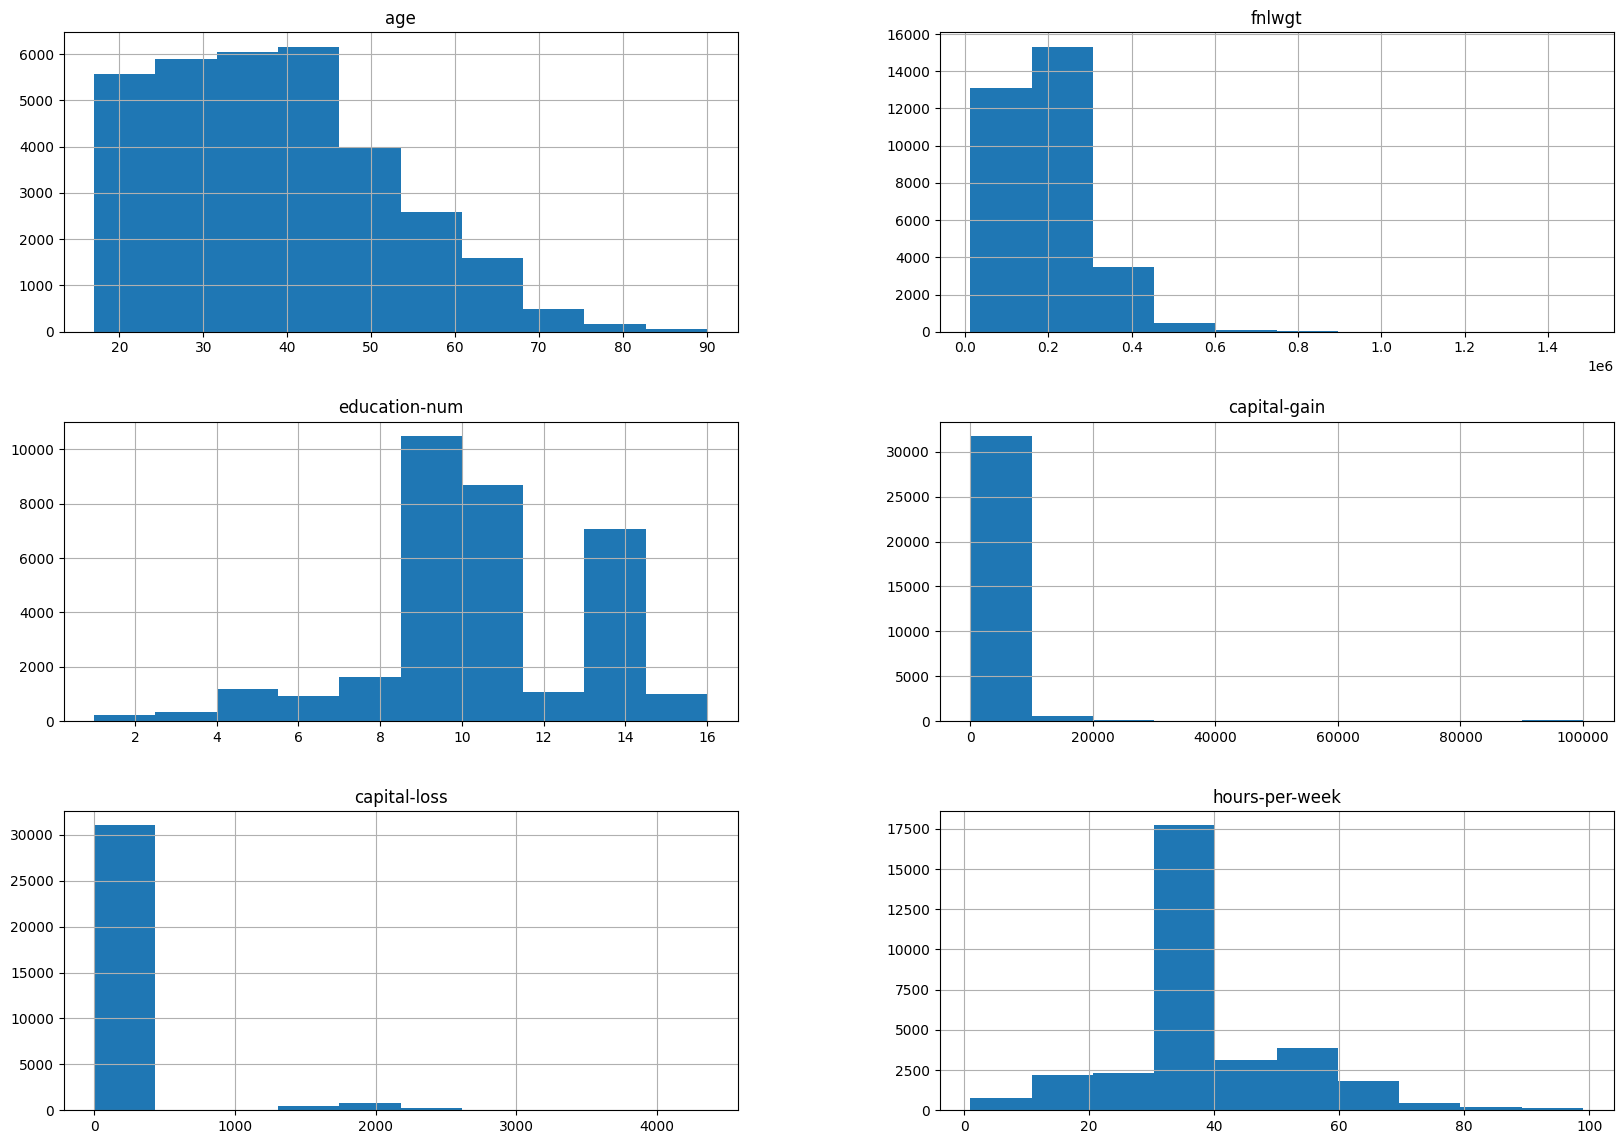

In [12]:
data_prepared.hist(figsize=(20, 14))

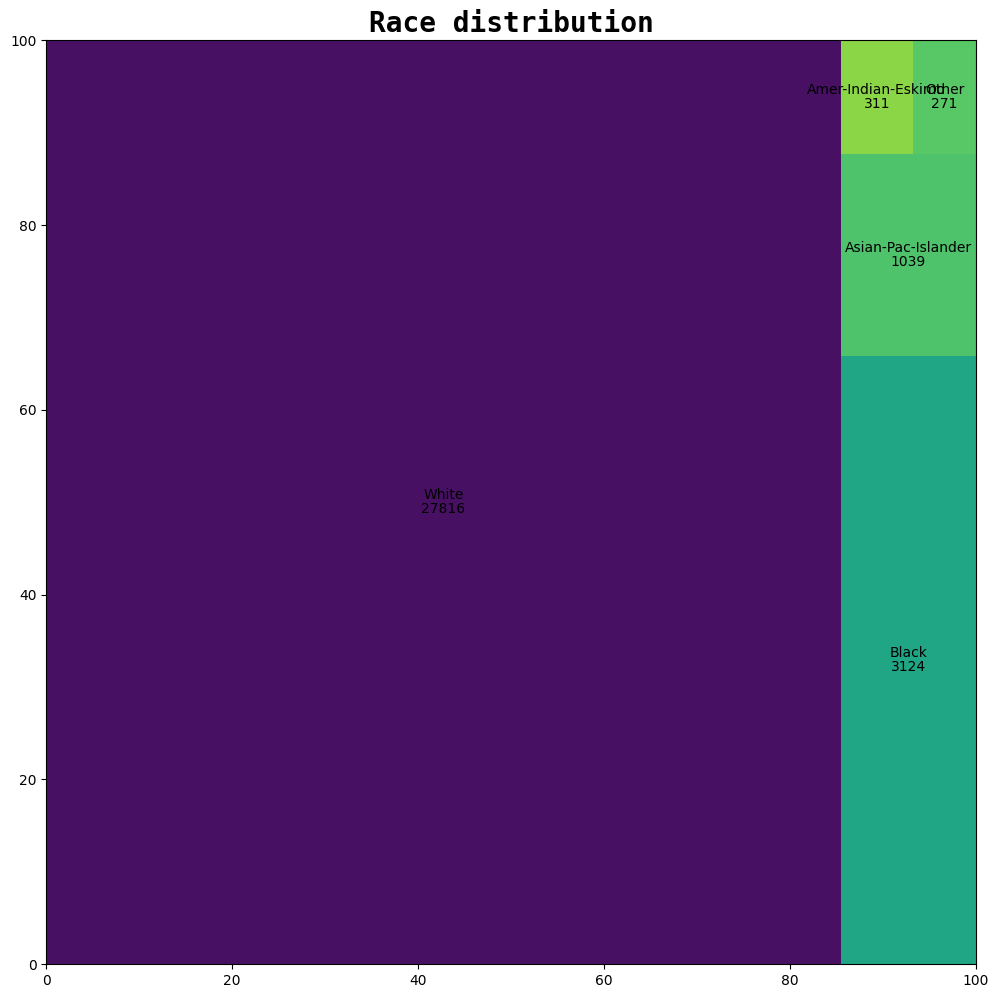

In [13]:
# Creating a Treemap for 'Race'
race = data_prepared['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(12, 12))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

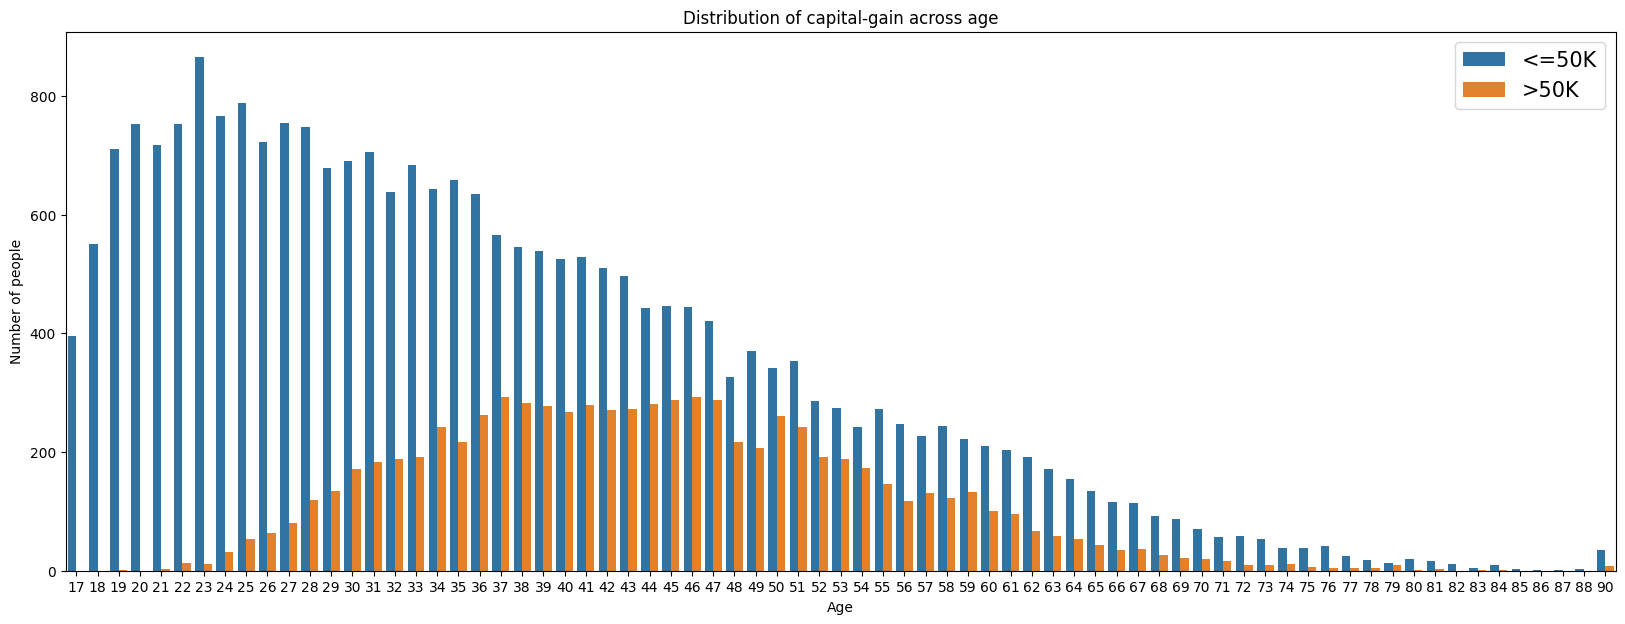

In [14]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data=data_prepared, x='age', hue='income')
plt.title('Distribution of capital-gain across age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.legend(loc=1, prop={'size': 15})
plt.show()

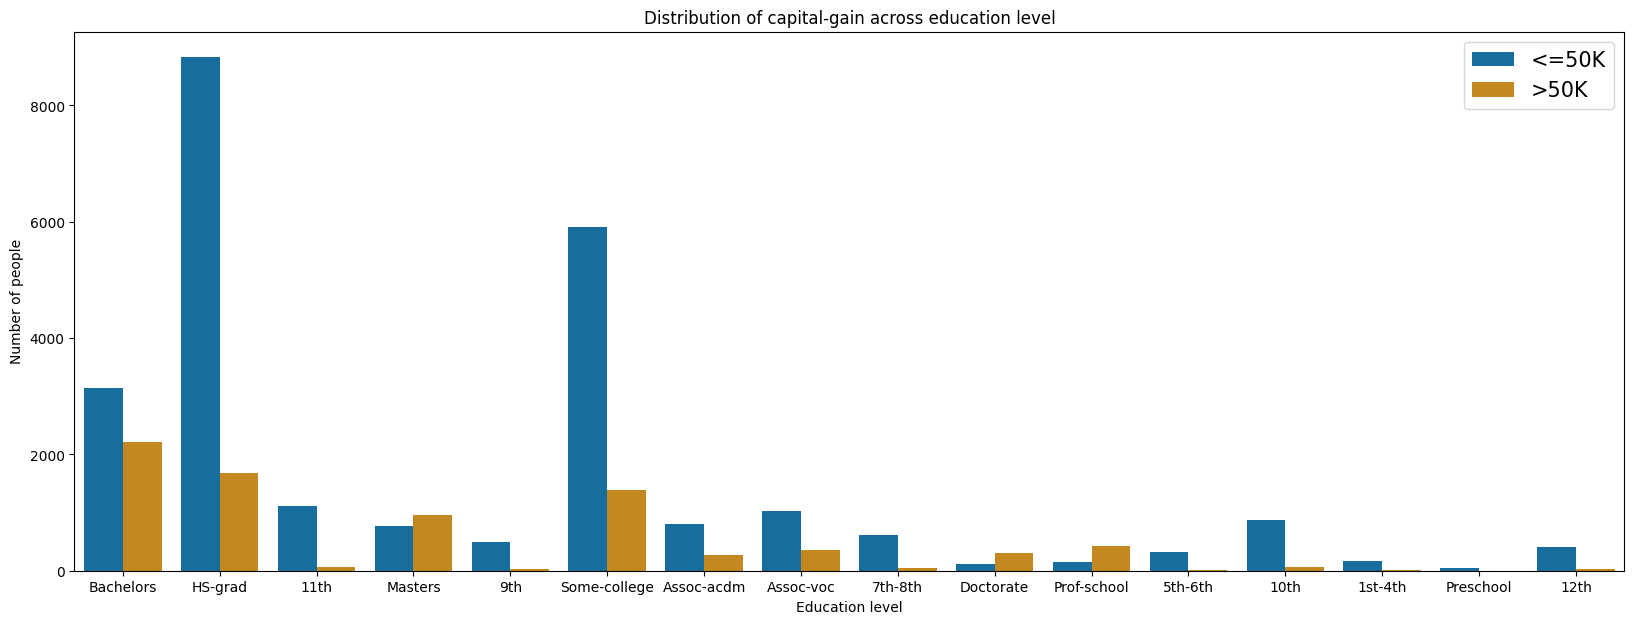

In [15]:
# Creating a countplot of income across education

plt.figure(figsize=(20, 7))
sns.countplot(data=data_prepared, x='education', hue='income', palette='colorblind')
plt.title('Distribution of capital-gain across education level')
plt.xlabel('Education level')
plt.ylabel('Number of people')
plt.legend(loc=1, prop={'size': 15})
plt.show()

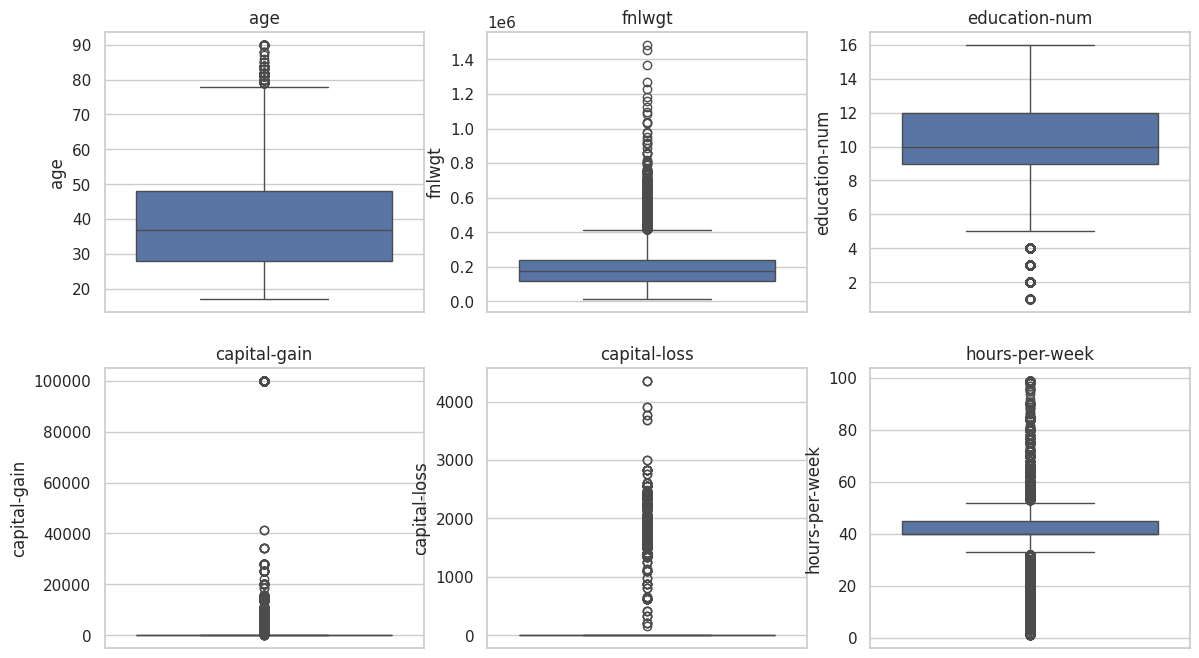

In [16]:
# Select only numeric columns for boxplot
numeric_columns = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

# Create a figure with multiple subplots
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot a boxplot for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the layout (2 rows, 3 columns)
    sns.boxplot(y=data_prepared[column])
    plt.title(column)

In [17]:
# handling the outliers (quantile < 0.24 and quantile > 75)

def handle_outliers(df, column):
    data_cleaned = df.copy()

    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

In [18]:
for column in numeric_columns:
    data_cleaned = handle_outliers(data_prepared, column)


print(f"Data shape before removing outliers: {data_prepared.shape}")
print(f"Data shape after removing outliers: {data_cleaned.shape}")

Data shape before removing outliers: (32561, 15)
Data shape after removing outliers: (23553, 15)


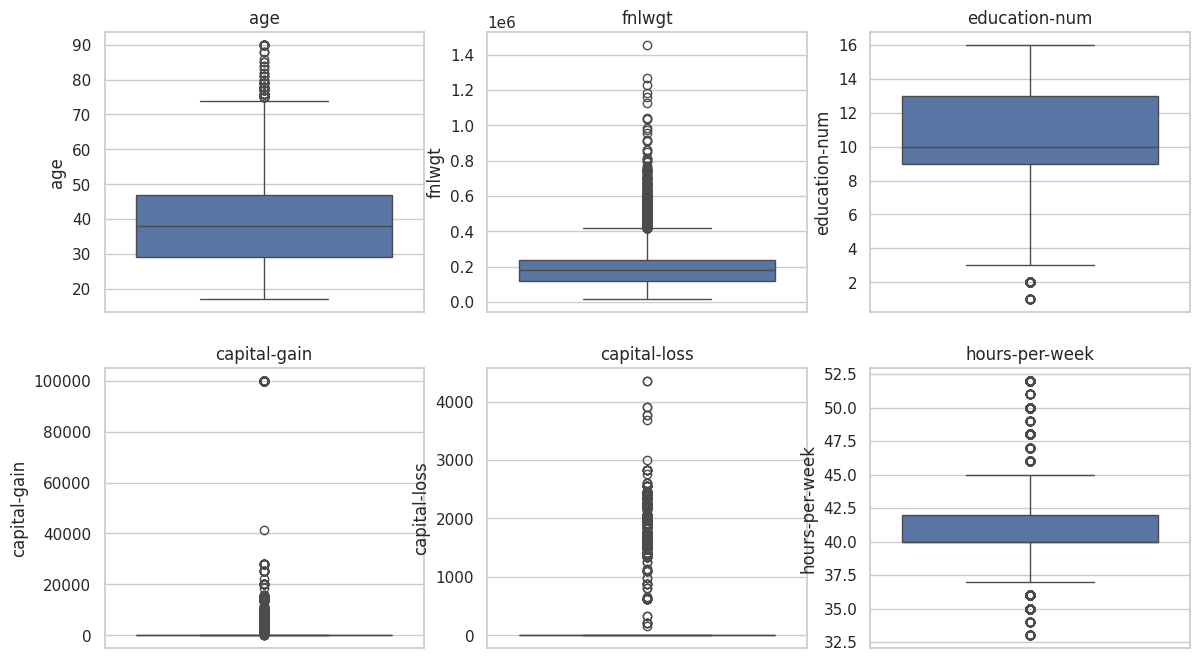

In [19]:
# Create a figure with multiple subplots
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Plot a boxplot for each numeric column
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the layout (2 rows, 3 columns)
    sns.boxplot(y=data_cleaned[column])
    plt.title(column)

## Preparation for Classification

In [20]:
data_cleaned

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [21]:
# encoding non-numeric variables

data_encoded = data_cleaned.copy()
le = preprocessing.LabelEncoder()

for column in data_encoded.select_dtypes(include=['object']).columns:
  data_encoded[column] = le.fit_transform(data_encoded[column])

data_encoded

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
5,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,3,310152,15,10,4,10,1,4,1,0,0,40,38,0
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0


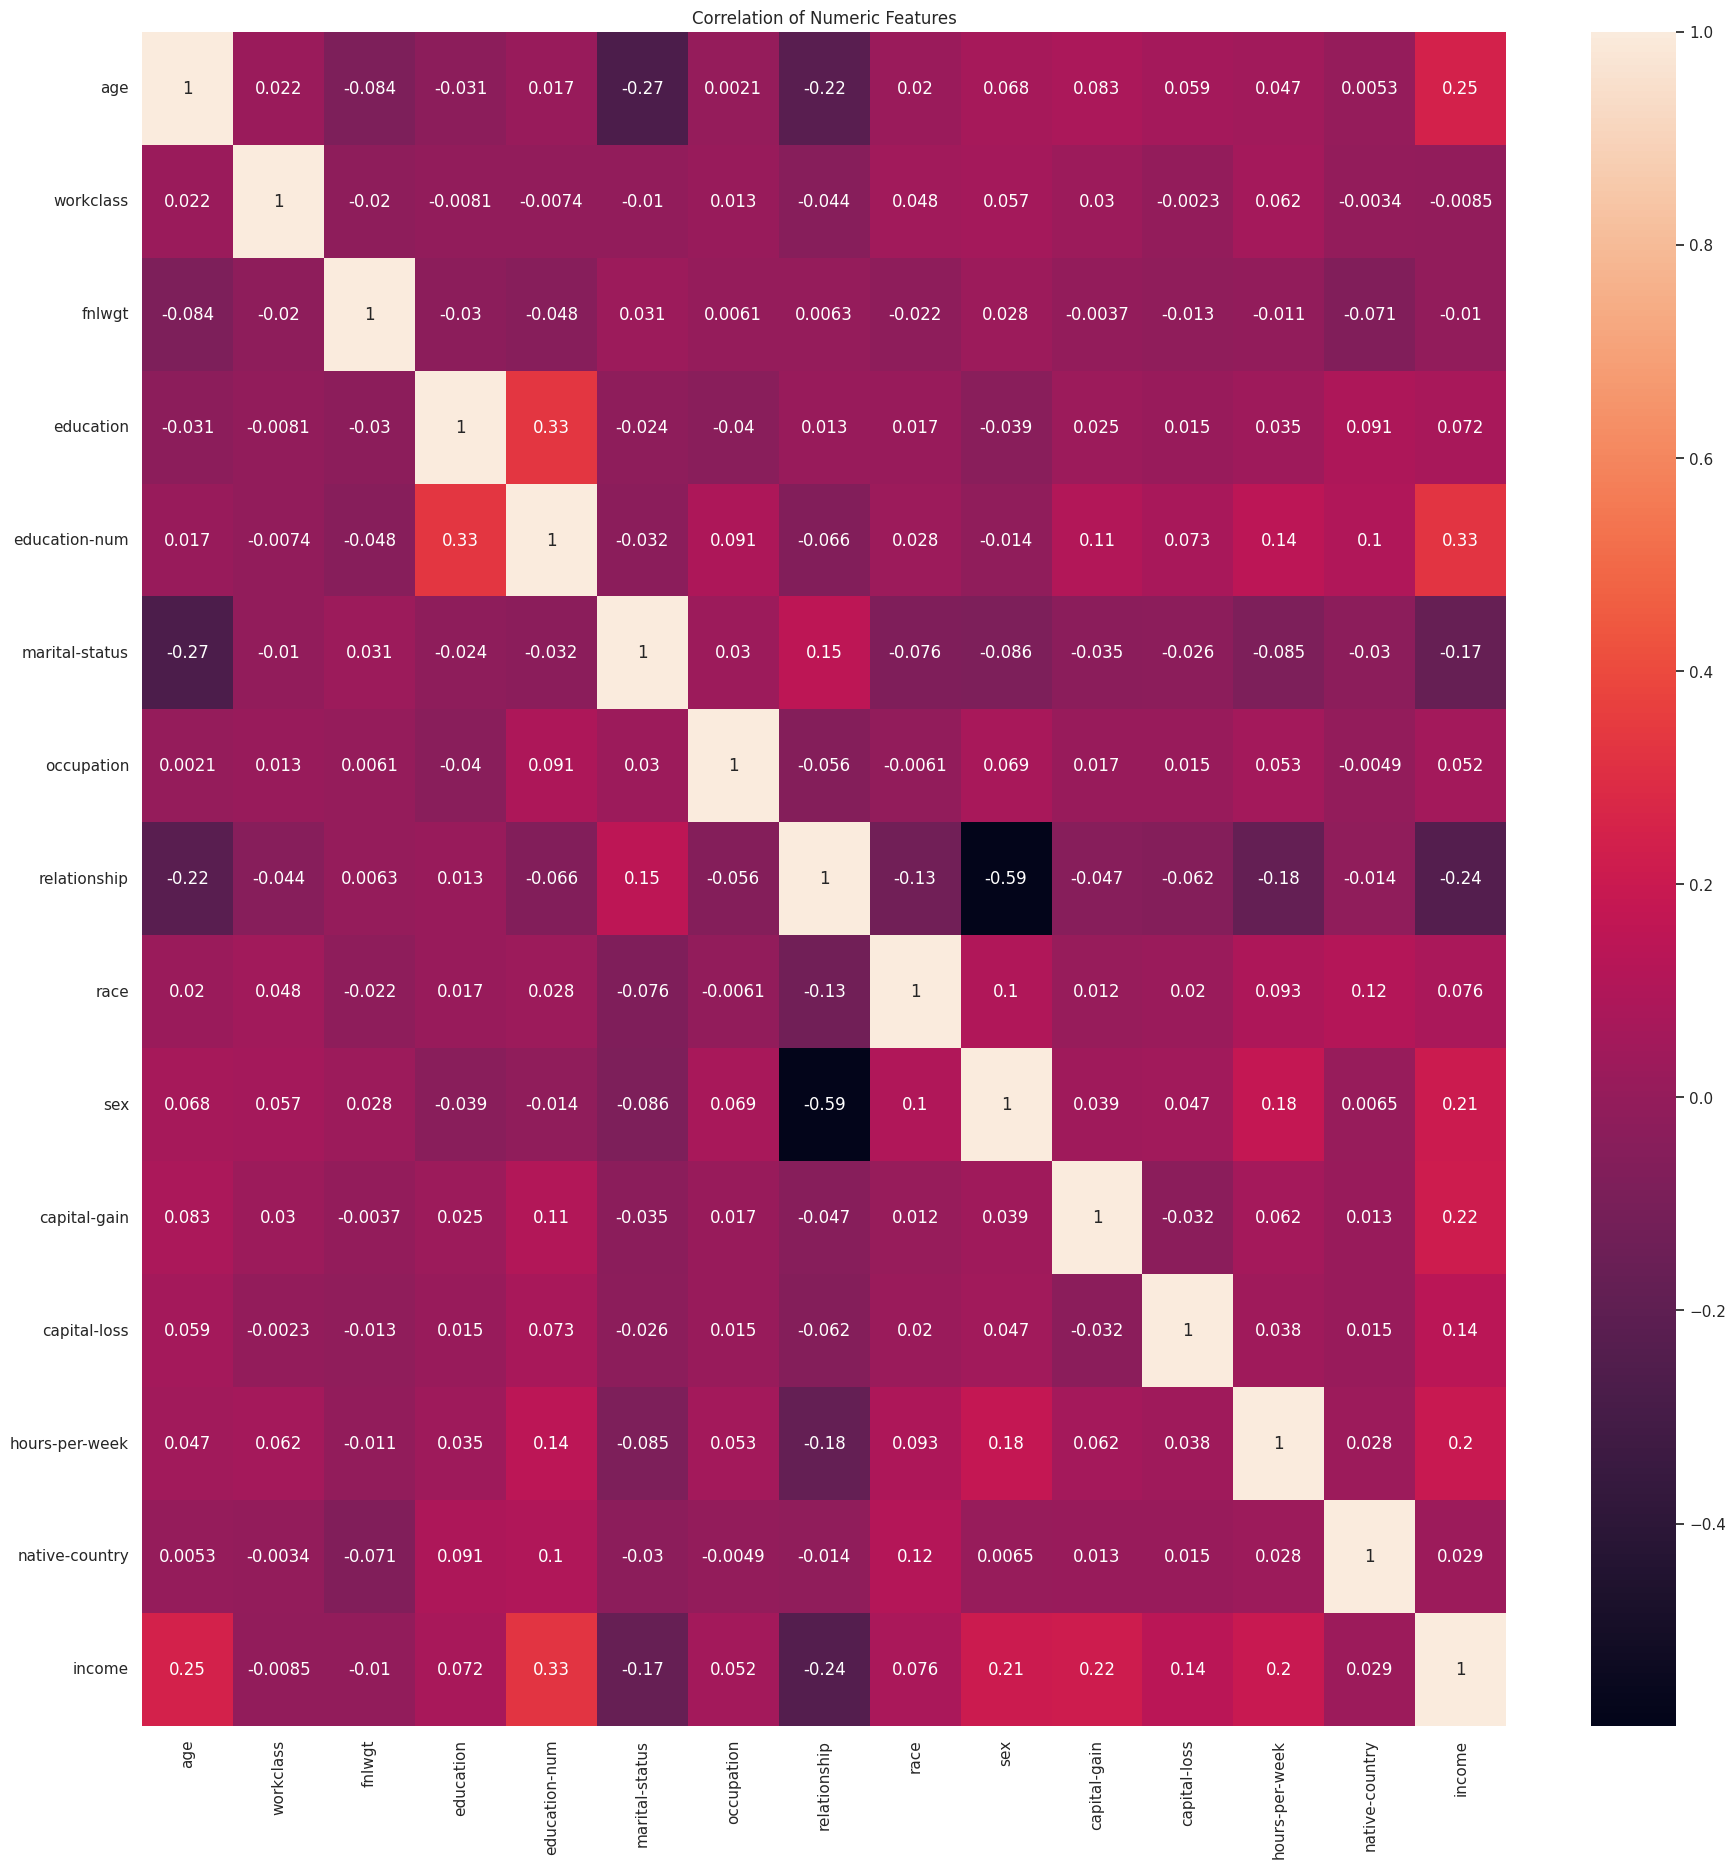

In [22]:
correlation_matrix = data_encoded.corr(method = 'pearson')

plt.figure(figsize=(22, 22))
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation of Numeric Features')
plt.show()

The dependent variable income is mostly correlated with age, education-num, capital-gain and hours-per-week.

In [23]:
# Creating a pairplot of dataset
#sns.pairplot(data_encoded)
#plt.show()

## Feature selection

In [24]:
X = data_encoded.drop('income', axis=1)
Y = data_encoded['income']

In [25]:
selector = SelectKBest(chi2)
X_selected = selector.fit_transform(X, Y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)

Selected features: Index(['age', 'fnlwgt', 'education-num', 'marital-status', 'occupation',
       'relationship', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


In [26]:
# leaving features with the highest score

X = X.drop(['workclass', 'education', 'race', 'native-country'], axis=1)

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler

for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

## Fixing imbalanced dataset

In [28]:
Y.value_counts(normalize=True)

,proportion
income,
0,0.744958
1,0.255042


In [29]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [30]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)
Y_resampled.value_counts(normalize=True)

,proportion
income,
0,0.5
1,0.5


## Creating a train test split

In [36]:
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, Y_resampled, test_size=0.3, stratify=Y_resampled, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [37]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", y_val.shape)

X_train shape: (24564, 10)
X_test shape: (5264, 10)
Y_train shape: (24564,)
Y_test shape: (5264,)
X_val shape: (5264, 10)
Y_val shape: (5264,)


## Model

### Hyperparameter tuning

In [39]:
# KNN

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_knn.fit(X_train, y_train)

print('best_params', grid_search_knn.best_params_)
print('best_score',  grid_search_knn.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
best_params {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
best_score 0.8641100258504493


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [42]:
# Decision Tree

dec_tree = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_dec = GridSearchCV(dec_tree, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_dec.fit(X_train, y_train)

print('best_params', grid_search_dec.best_params_)
print('best_score',  grid_search_dec.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
best_params {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
best_score 0.879742594433037


In [44]:
# Logistic Regression

logreg = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga', 'liblinear']
}

grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_logreg.fit(X_train, y_train)

print('best_params', grid_search_logreg.best_params_)
print('best_score',  grid_search_logreg.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and

best_params {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
best_score 0.761480203422284


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
125 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/

### K-NN

In [46]:
knn = KNeighborsClassifier(metric=grid_search_knn.best_params_['metric'],
                           n_neighbors=grid_search_knn.best_params_['n_neighbors'],
                           weights = grid_search_knn.best_params_['weights'])
knn.fit(X_train, y_train)

Y_pred_knn = knn.predict(X_test)

# 5-fold cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.85711378 0.86322003 0.86586607 0.87156524 0.86278502]
Average cross-validation score: 0.8641100258504493


### Decision Tree

In [47]:
dec_tree = DecisionTreeClassifier(max_depth=grid_search_dec.best_params_['max_depth'],
                                  criterion=grid_search_dec.best_params_['criterion'],
                                  min_samples_leaf = grid_search_dec.best_params_['min_samples_leaf'],
                                  min_samples_split = grid_search_dec.best_params_['min_samples_split'],
                                  random_state=42)
dec_tree.fit(X_train, y_train)
Y_pred_dec_tree = dec_tree.predict(X_test)

# 5-fold cross-validation
cv_scores = cross_val_score(dec_tree, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.87828211 0.88031752 0.88540607 0.8797069  0.87438925]
Average cross-validation score: 0.8796203700081747


### Logistic Regression

In [48]:
logreg = LogisticRegression(C=grid_search_logreg.best_params_['C'],
                            penalty=grid_search_logreg.best_params_['penalty'],
                            solver = grid_search_logreg.best_params_['solver'])
logreg.fit(X_train, y_train)
Y_pred_log = logreg.predict(X_test)

# 5-fold cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.7691838  0.75636068 0.76226338 0.75839609 0.76119707]
Average cross-validation score: 0.761480203422284


## Evaluation

In [49]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(y_val, Y_pred_knn) * 100, 2))
print('Precision score:', round(precision_score(y_val, Y_pred_knn) * 100, 2))
print('Recall score:', round(recall_score(y_val, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(y_val, Y_pred_knn) * 100, 2))

print('---------')

print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(y_val, Y_pred_dec_tree) * 100, 2))
print('Precision score:', round(precision_score(y_val, Y_pred_dec_tree) * 100, 2))
print('Recall score:', round(recall_score(y_val, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(y_val, Y_pred_dec_tree) * 100, 2))

print('---------')

print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_val, Y_pred_log) * 100, 2))
print('Precision score:', round(precision_score(y_val, Y_pred_log) * 100, 2))
print('Recall score:', round(recall_score(y_val, Y_pred_log) * 100, 2))
print('F1 score:', round(f1_score(y_val, Y_pred_log) * 100, 2))

KNN Classifier:
Accuracy score: 49.01
Precision score: 49.17
Recall score: 58.24
F1 score: 53.32
---------
Decision Tree Classifier:
Accuracy score: 49.26
Precision score: 49.33
Recall score: 58.24
F1 score: 51.83
---------
Logistic Regression:
Accuracy score: 49.85
Precision score: 49.85
Recall score: 49.2
F1 score: 49.52
